In [1]:
import cv2
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:


x = np.linspace(0, 180, 1000000)
si = np.sin(np.pi*x/180.0)
co = np.cos(np.pi*x/180.0)




In [5]:
t1 = cv2.getTickCount()
for i in range(100):
    r = cv2.absdiff(si, co)
t2 = cv2.getTickCount()
print r
print  (t2-t1)/cv2.getTickFrequency(), "cv2.absdiff()"

[[1.        ]
 [0.99999686]
 [0.99999372]
 ...
 [1.00000628]
 [1.00000314]
 [1.        ]]
0.463418456


In [6]:

t3 = cv2.getTickCount()
for i in range(100):
    r2 = np.abs(si-co)
t4 = cv2.getTickCount()
print r2
print  (t4-t3)/cv2.getTickFrequency(), "np.abs()"


[1.         0.99999686 0.99999372 ... 1.00000628 1.00000314 1.        ]
0.588046359


In [3]:
def myAbsDiff(a, b):
    assert a.shape == b.shape
    if len(a.shape) == 1:
        r = np.zeros(a.shape, dtype=a.dtype)
        for i in xrange(a.shape[0]):
            if a[i] > b[i]:
                r[i] = a[i] -b[i]
            else:
                r[i] = b[i] - a[i]
        return r
    elif len(a.shape) == 2:
        r = np.zeros(a.shape)
        for y in xrange(a.shape[0]):
            for x in xrange(a.shape[1]):
                if a[y, x] > b[y,x]:
                    r[y, x] = a[y, x] - b[y,x]
                else:
                    r[y, x] = b[y, x] - a[y,x]
                    
        return r.astype(a.dtype)

In [11]:


t5 = cv2.getTickCount()
for i in range(100):
    r3 = myAbsDiff(si, co)
t6 = cv2.getTickCount()

print r3
print  (t6-t5)/cv2.getTickFrequency(), "myAbsDiff()"

[1.         0.99999686 0.99999372 ... 1.00000628 1.00000314 1.        ]
41.749597754 myAbsDiff()


In [12]:
from skimage import data
img = data.astronaut()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print gray.shape
gray2 = gray[:, ::-1]

r = myAbsDiff(gray, gray2)
print r.shape
print r.dtype


(512, 512)
(512, 512)
uint8


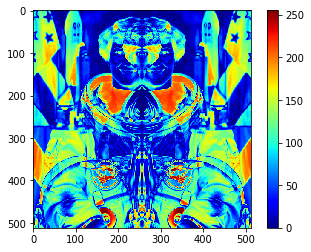

In [8]:

plt.imshow(r)
plt.colorbar()
plt.jet()

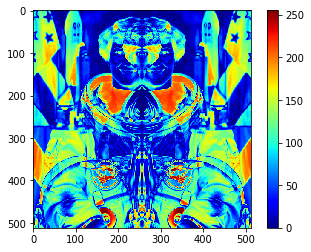

In [9]:
r2 = cv2.absdiff(gray, gray2)
plt.imshow(r2)
plt.colorbar()
plt.jet()

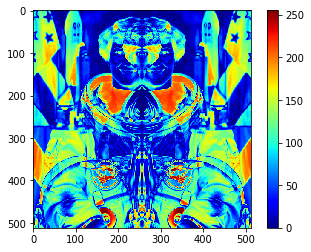

In [10]:
r3 = np.abs(gray.astype(np.float32) - gray2.astype(np.float32))
plt.imshow(r3)
plt.colorbar()
plt.jet()